In [300]:

#LIBRARIES
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf
import pip 
import sklearn

In [337]:
#LOAD DATA
!unzip Brain_Tumor_Data_Set

2019390.57s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
Archive:  Brain_Tumor_Data_Set.zip
replace Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [338]:
folder_path = "data/"

In [339]:
import splitfolders
splitfolders.ratio('Brain Tumor Data Set', output="data", seed=1337, ratio=(.8, 0.1,0.1))

test_path = folder_path + 'test'
train_path = folder_path + 'train'
val_path = folder_path + 'val'

print(os.listdir(train_path))
print(os.listdir(train_path))

['Healthy', 'Brain Tumor']
['Healthy', 'Brain Tumor']


In [340]:
print(os.listdir(train_path+'/Healthy')[0])
print(os.listdir(train_path+'/Brain Tumor')[0])

Not Cancer  (1727).jpg
Cancer (497).jpg


(225, 225, 3)


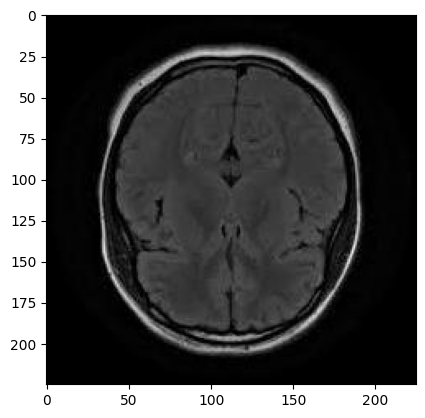

In [341]:
healthy_img_path = train_path+'/Healthy/'+os.listdir(train_path+'/Healthy')[3]
healthy_img_path
healthy_img = plt.imread(healthy_img_path)
plt.imshow(healthy_img)
print(healthy_img.shape)

(512, 512, 3)


(512, 512, 3)

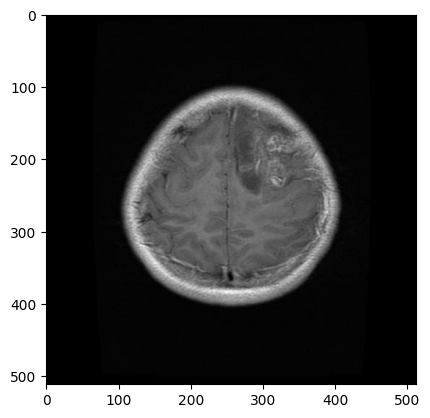

In [373]:
tumor_img_path = train_path+'/Brain Tumor/'+os.listdir(train_path+'/Brain Tumor')[0]
tumor_img = plt.imread(tumor_img_path)
plt.imshow(tumor_img)
print(tumor_img.shape)


In [343]:
print("Num of healthy imgs: ", len(os.listdir(train_path+'/Healthy')))
print("Num of brain tumor imgs: ", len(os.listdir(train_path+'/Brain Tumor')))

Num of healthy imgs:  1669
Num of brain tumor imgs:  2010


In [344]:
#IMAGE AUGMENTATION

from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.10,
                               height_shift_range=0.10,
                               rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest'
                              )


image_gen.flow_from_directory(train_path)
image_gen.flow_from_directory(val_path)
image_gen.flow_from_directory(test_path)

Found 3679 images belonging to 2 classes.
Found 459 images belonging to 2 classes.
Found 462 images belonging to 2 classes.


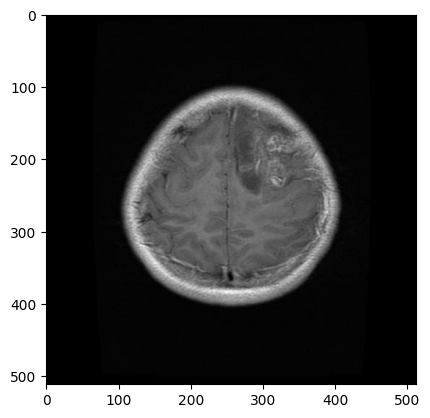

In [370]:
plt.imshow(tumor_img)

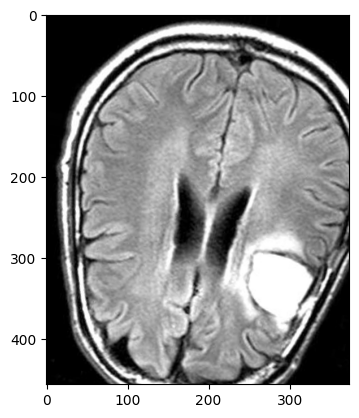

In [346]:
plt.imshow(image_gen.random_transform(tumor_img))

In [347]:
train_set = tf.keras.preprocessing.image_dataset_from_directory(train_path, label_mode = 'categorical')
validation_set = tf.keras.preprocessing.image_dataset_from_directory(val_path, label_mode = 'categorical')
test_set = tf.keras.preprocessing.image_dataset_from_directory(test_path, label_mode = 'categorical',shuffle=False)


Found 3609 files belonging to 2 classes.
Found 449 files belonging to 2 classes.
Found 456 files belonging to 2 classes.


In [348]:
#MODEL

model = tf.keras.Sequential()

import ssl

ssl._create_default_https_context = ssl._create_unverified_context

imported_model= tf.keras.applications.resnet.ResNet50(include_top=False
                                               ,classes=2,
                                               input_shape=(256,256,3),
                                               pooling = 'avg',
                                               weights='imagenet')


for layer in imported_model.layers:
  layer.trainable=False

In [349]:
from tensorflow.python.keras.layers import Dense, Flatten

model.add(imported_model)

print(imported_model.output_shape)

model.add(tf.keras.layers.Flatten())


(None, 2048)


In [350]:
model.add(tf.keras.layers.Dense(512, activation = 'relu'))

In [351]:
model.add(tf.keras.layers.Dense(2, activation = 'sigmoid'))

In [352]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [353]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
              metrics=['accuracy'])

In [354]:
his = model.fit(train_set, validation_data=validation_set, epochs=2)
his

Epoch 1/2
113/113 ━━━━━━━━━━━━━━━━━━━━ 680s 6s/step - accuracy: 0.7750 - loss: 2.5578 - val_accuracy: 0.9621 - val_loss: 0.0966
Epoch 2/2
113/113 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.9469 - loss: 0.1429 - val_accuracy: 0.9577 - val_loss: 0.1124


In [355]:
results = model.evaluate(test_set)

15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9405 - loss: 0.1410


In [356]:
X_test = list(map(lambda x: x[0], test_set))
y_test = list(map(lambda x: x[1], test_set))
X_test_mod = tf.concat(X_test,axis=0)
y_test_mod = tf.concat(y_test,axis=0)

2024-04-10 20:26:37.123331: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-10 20:26:37.273264: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [357]:
preds = model.predict(X_test_mod)

15/15 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


In [358]:
y_test_mod2 = tf.math.argmax(y_test_mod, axis = 1)
preds_mod = tf.math.argmax(preds, axis = 1)

In [359]:
matrix = sklearn.metrics.confusion_matrix(y_test_mod2,preds_mod)
matrix

array([[229,  17],
       [  6, 204]])

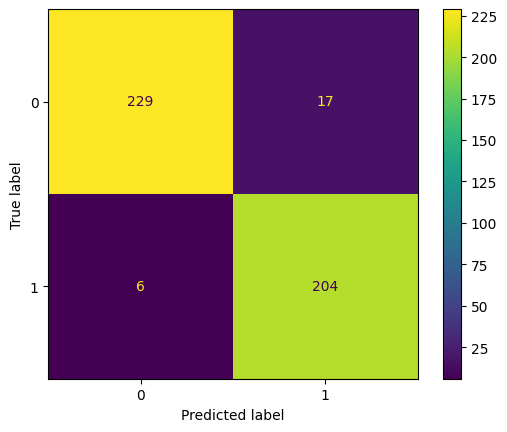

In [360]:
mat = sklearn.metrics.ConfusionMatrixDisplay(matrix)
mat.plot()
plt.show()

<Axes: >

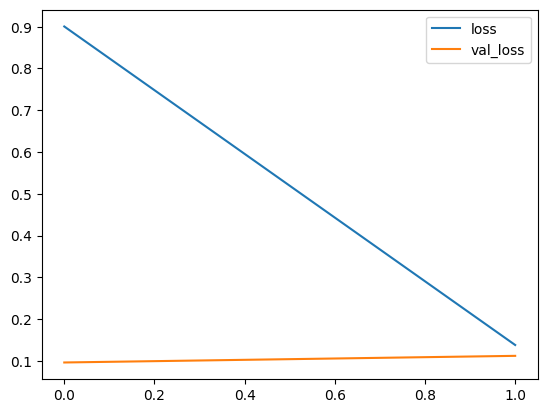

In [361]:
losses = pd.DataFrame(his.history)
losses[['loss','val_loss']].plot()

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

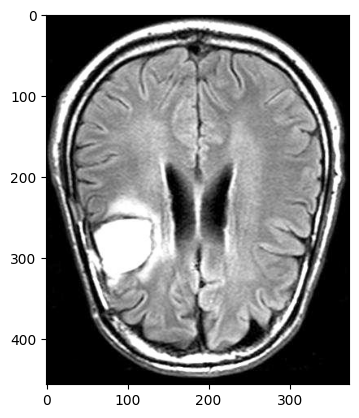

In [365]:
#LIME AI

from lime import lime_image

plt.imshow(plt.imread(tumor_img_path))
tumor_img = plt.imread(tumor_img_path)

In [385]:
from skimage.segmentation import mark_boundaries
from IPython.display import display
import lime

explainer = lime_image.LimeImageExplainer()
img_array = np.array(tumor_img)
print(img_array.shape)

a = explainer.explain_instance(img_array, model.predict, labels=("Healthy", "Brain Tumor"), top_labels=1, num_features=30, num_samples=100, distance_metric='cosine')






(512, 512, 3)


  9%|▉         | 9/100 [00:00<00:01, 48.76it/s]


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "resnet50" is incompatible with the layer: expected shape=(None, 256, 256, 3), found shape=(10, 512, 512, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(10, 512, 512, 3), dtype=uint8)
  • training=False
  • mask=None

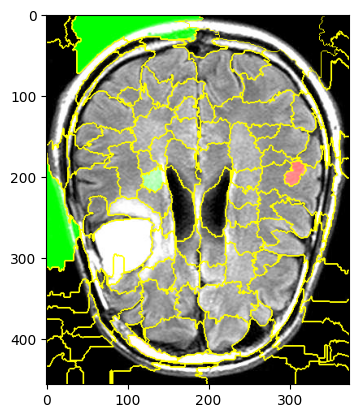

In [336]:
# Get the image explanation
b, c = a.get_image_and_mask(label=a.top_labels[0], positive_only=False, num_features=5, hide_rest=False)

plt.imshow(mark_boundaries(b, a.segments))
plt.show()